# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:]

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
%matplotlib inline

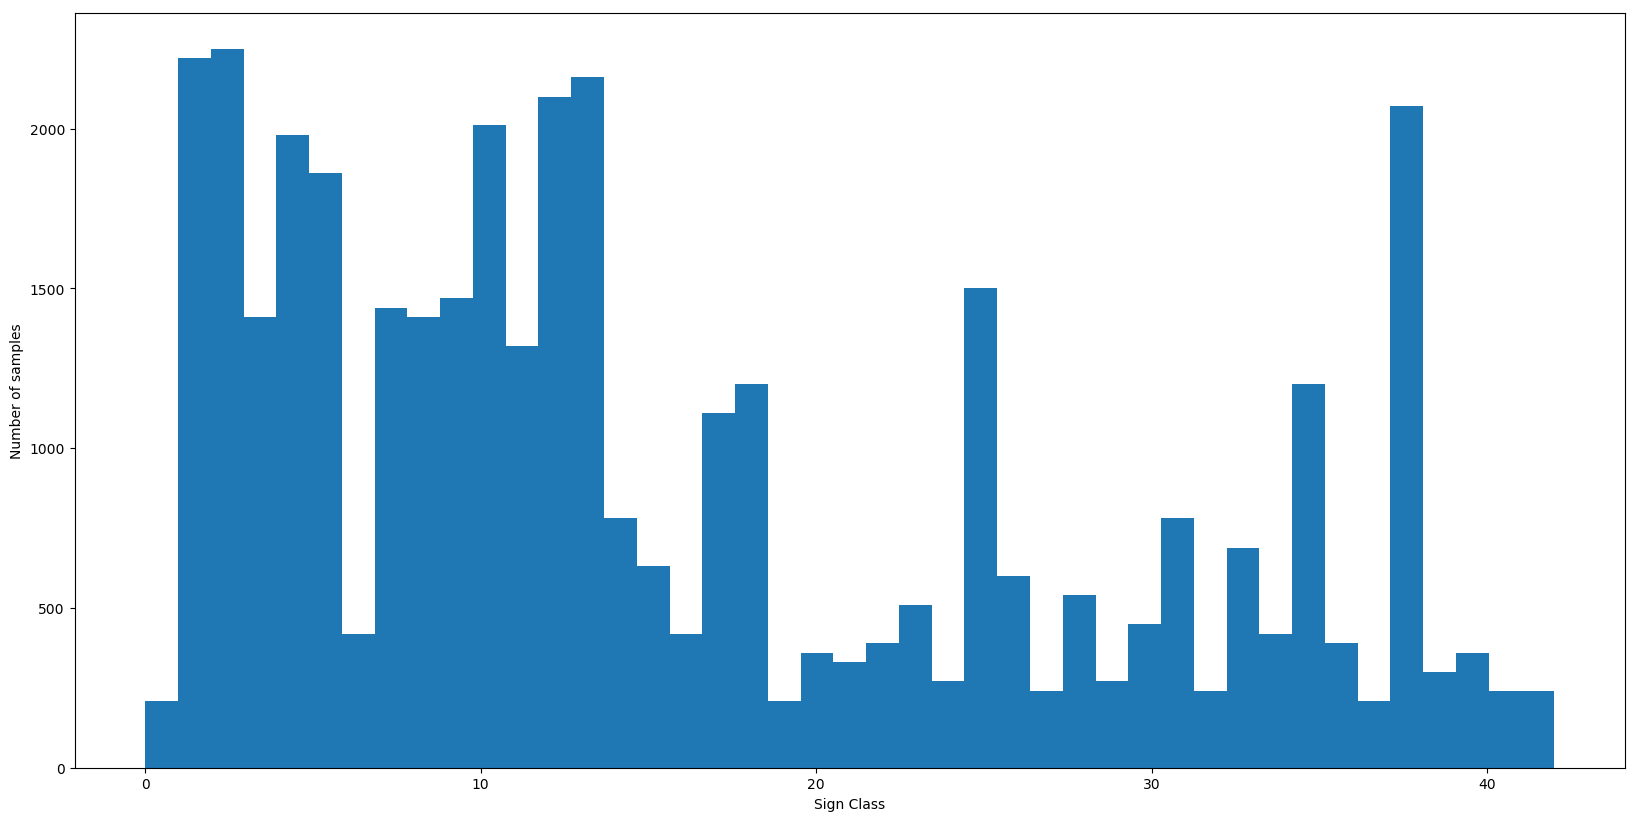

In [5]:
#distribution of examples per class
plt.hist(y_train, bins=n_classes);
plt.xlabel('Sign Class');
plt.ylabel('Number of samples');

In [6]:
def show_images(images, labels_true, rows, cols, cls=None, random=True, labels_predicted=None):
    fig, axes = plt.subplots(rows, cols)
    fig.subplots_adjust(hspace=0.37, wspace=0.3)
    imidx = 0
    for i, ax in enumerate(axes.flat):
        while True:
            if random:
                example = np.random.randint(0, len(images))
            else:
                example = imidx
                imidx += 1
            if cls is None or labels_true[example]==cls:
                break
        if example >= len(images):
            return
        if len(images.shape)==4:
            ax.imshow(images[example,:,:,:]);
        else:
            ax.imshow(images[example,:,:], cmap='Greys_r');
        ax.set_xticks([])
        ax.set_yticks([])
        if labels_predicted is not None:
            str = '{}: true {} pred {}'.format(example, labels_true[example], labels_predicted[example])
        else:
            str = '{}: true {}'.format(example, labels_true[example])
        ax.set_xlabel(str)

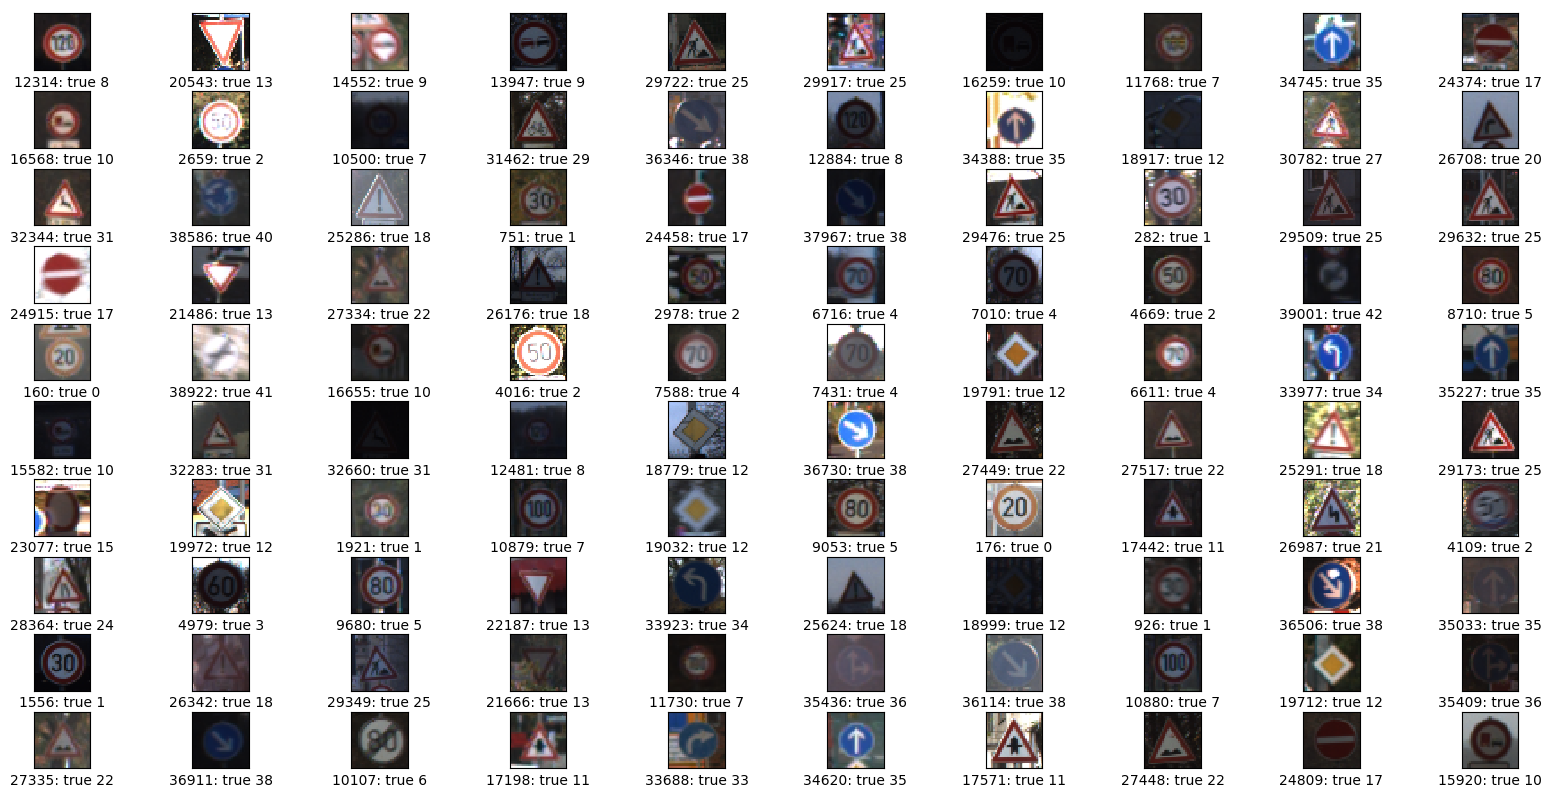

In [7]:
# randomly show grid 10x10 examples from training data set and their true class
rows = 10
cols = 10
cls = None
show_images(X_train, y_train, rows, cols, cls)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [9]:
# average pixel intensity is around 128. good idea to normalize this to between -1 and 1
X_train[0].mean()

128.59407552083334

In [10]:
def normalize_data(image_data):
    return np.true_divide(np.subtract(image_data, np.array([128.])), np.array([256.]))

In [11]:
# normalised images in training and test sets
x_train_norm = normalize_data(X_train)
x_test_norm = normalize_data(X_test)

In [12]:
# right, we have 3 color channels and 32x32 images
x_train_norm.shape

(39209, 32, 32, 3)

In [13]:
# and the pixel intensities are normalised around zero, with min/max of -1/+1
x_train_norm[0].mean(), x_train_norm[0].std()

(0.0023206075032552085, 0.18579474255753461)

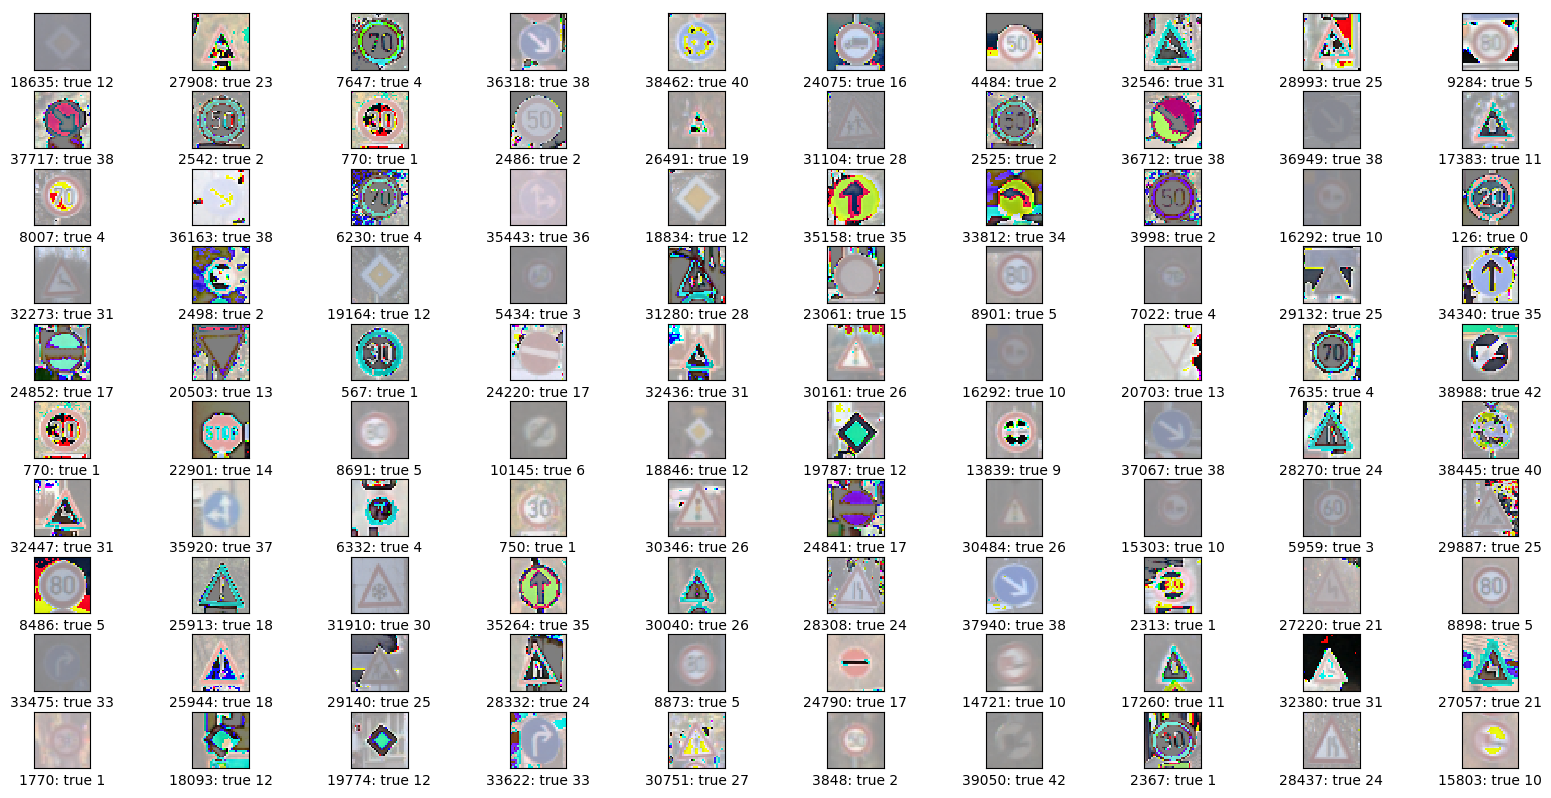

In [14]:
# visualize normalised images
rows = 10
cols = 10
cls = None
show_images(x_train_norm, y_train, rows, cols, cls)

In [15]:
# apply One-Hot Encoding for class labels. at the moment they are integers 0..42
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_norm = encoder.transform(y_train)
y_test_norm = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train_norm = y_train_norm.astype(np.float32)
y_test_norm  = y_test_norm.astype(np.float32)

In [16]:
y_train_norm.shape

(39209, 43)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

Alexey:
I have played with:
1. grayscale normalization 
2. subtracting the train set mean, dividing by max value in the test set
3. simple (x-128)/255 transformation for all three channels (implemented above) 

In my experience for CNN colour works as good as grayscale.

And approach 2 depends on train set, which may vary. So it is not most generic.

In the end I have decided to go ahead with simple normalization of each of RGB channels (approach 3)



.

In [17]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [18]:
pct_train = 85.
pct_valid = 15.
random_state = 123

train_features, val_features, train_labels, val_labels = train_test_split(
                                                            x_train_norm, y_train_norm, 
                                                            train_size = pct_train/100., 
                                                            test_size = pct_valid/100.,
                                                            random_state = random_state)

In [19]:
train_features.shape

(33327, 32, 32, 3)

In [20]:
train_labels.shape

(33327, 43)

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

Alexey:

I have decided to not produce any additional data (jitter, rotations etc) for simplicity and lack of time as I was mostly focusing on learning/playing with CNN to get a feel for how they work.

For splitting into training/validation sets I use 85/15% split of the original training data set using train_test_split sklearn.model_selection. I initialise random seed to the same value to avoid validation set leaking into training results from repetetive runs when I save/restore model to continue training.

.

In [21]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [22]:
import tensorflow as tf
import math
from datetime import datetime

In [23]:
class TrafficSignClassifier:
    # initialization defaults as class variables
    _trunc_normal_stddev = 0.05
    _bias_init = 0.1
    _L1_kernel_size = 5
    _L1_out_channels = 64
    _kernel1_strides = [1, 1, 1, 1]
    _pool1_kernel = [1, 2, 2, 1]
    _pool1_strides = [1, 2, 2, 1]
    _L2_kernel_size = 5
    _L2_out_channels = 32
    _kernel2_strides = [1, 1, 1, 1]
    _pool2_kernel = [1, 2, 2, 1]
    _pool2_strides = [1, 2, 2, 1]
    
    def __init__(self):
        # input placeholders
        self._images = None
        self._labels = None
        # layer setup
        # Layer 1
        self._kernel1 = None
        self._conv1 = None
        self._bias1 = None
        self._biased1 = None
        self._conv1r = None
        self._pool1 = None
        # Layer 2
        self._kernel2 = None
        self._conv2 = None
        self._bias2 = None
        self._biased2 = None
        self._conv2r = None
        self._pool2 = None
        # reshape
        self._reshape2 = None
        # dropout
        self._keep_prob = None
        self._dropout = None
        # Level 3 FC
        self._weights3 = None
        self._biases3 = None
        self._local3 = None
        # softmax
        self._prediction = None
        self._cross_entropy = None
        self._loss = None
        self._true_class = None
        self._predicted_class = None
        self._accuracy = None
        # savers
        self._model_param_file = None
        self._saver = None
        self._summary_dir = None
        self._summaries = None
        self._summary_writer = None
        # optimizer
        self._optimizer = None
    
    def variable_summaries(self, var):
        """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
        with tf.name_scope('summaries'):
            mean = tf.reduce_mean(var)
            tf.summary.scalar('mean/'+var.name, mean)
            with tf.name_scope('stddev'):
                stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
            tf.summary.scalar('stddev/'+var.name, stddev)
            tf.summary.scalar('max/'+var.name, tf.reduce_max(var))
            tf.summary.scalar('min/'+var.name, tf.reduce_min(var))
            tf.summary.histogram('histogram/'+var.name, var)
    
    def define_model(self, features_shape, labels_shape):
        self._images = tf.placeholder(tf.float32, shape=features_shape, name='images')
        self._labels = tf.placeholder(tf.float32, name='labels')
                
        # layer 1
        k1_params = [self._L1_kernel_size, self._L1_kernel_size, features_shape[3], self._L1_out_channels]
        self._kernel1 = tf.Variable(tf.truncated_normal(k1_params, stddev=self._trunc_normal_stddev), name='L1_kernel')
        self.variable_summaries(self._kernel1)
        self._conv1 = tf.nn.conv2d(self._images, self._kernel1, strides=self._kernel1_strides, padding='SAME')
        tf.summary.histogram('conv1', self._conv1)
        self._bias1 = tf.Variable(tf.constant(np.ones(self._L1_out_channels, np.float32)*self._bias_init), name='L1_bias')
        self.variable_summaries(self._bias1)
        self._biased1 = tf.nn.bias_add(self._conv1, self._bias1)
        self._conv1r = tf.nn.relu(self._biased1)
        tf.summary.histogram('conv1r', self._conv1r)
        self._pool1 = tf.nn.max_pool(self._conv1r, 
                                       ksize = self._pool1_kernel, 
                                       strides = self._pool1_strides,
                                       padding='SAME')
        tf.summary.histogram('pool1', self._pool1)
        # layer 2
        k2_params = [self._L2_kernel_size, self._L2_kernel_size, self._L1_out_channels, self._L2_out_channels]
        self._kernel2 = tf.Variable(tf.truncated_normal(k2_params, stddev=self._trunc_normal_stddev), name='L2_kernel')
        self.variable_summaries(self._kernel2)
        self._conv2 = tf.nn.conv2d(self._pool1, self._kernel2, strides=self._kernel2_strides, padding='SAME')
        tf.summary.histogram('conv2', self._conv2)
        self._bias2 = tf.Variable(tf.constant(np.ones(self._L2_out_channels, np.float32)*self._bias_init), name='L2_bias')
        self.variable_summaries(self._bias2)
        self._biased2 = tf.nn.bias_add(self._conv2, self._bias2)
        self._conv2r = tf.nn.relu(self._biased2)
        tf.summary.histogram('conv2r', self._conv2r)
        self._pool2 = tf.nn.max_pool(self._conv2r, 
                               ksize = self._pool2_kernel,
                               strides = self._pool2_strides, 
                               padding='SAME')
        tf.summary.histogram('pool2', self._pool2)
        # reshape
        shape = self._pool2.get_shape().as_list()
        dim = np.prod(shape[1:])
        self._reshape2 = tf.reshape(self._pool2, [-1, dim])
        # DROPOUT
        self._keep_prob = tf.placeholder(tf.float32, name='dropout_keep_probability')
        self._dropout = tf.nn.dropout(self._reshape2, self._keep_prob)
        tf.summary.histogram('dropout', self._dropout)
        tf.summary.scalar('dropout_keep_probability', self._keep_prob)
        # layer 3 fully connected
        init_range = math.sqrt(6.0 / (dim + labels_shape[1]))
        self._weights3 = tf.Variable(tf.random_uniform([dim, labels_shape[1]], -init_range, init_range), name='FC1_weights')
        self.variable_summaries(self._weights3)
        self._biases3 = tf.Variable(tf.constant(np.ones(labels_shape[1], np.float32)*self._bias_init), name='FC1_bias')
        self.variable_summaries(self._biases3)
        self._local3 = tf.matmul(self._dropout, self._weights3) + self._biases3
        tf.summary.histogram('local3', self._local3)
        # softmax
        self._prediction = tf.nn.softmax(self._local3)
        tf.summary.histogram('prediction', self._prediction)
        # Cross entropy
        self._cross_entropy = tf.reduce_mean(-tf.reduce_sum(
                                            self._labels * tf.log(tf.clip_by_value(self._prediction,1e-10,1.0)), 
                                            reduction_indices=[1]))
        tf.summary.scalar('xentropy', self._cross_entropy)
        # training loss
        self._loss = tf.reduce_mean(self._cross_entropy)
        tf.summary.scalar('loss', self._loss)
        # accuracy
        self._true_class      = tf.argmax(self._labels, 1)
        self._predicted_class = tf.argmax(self._prediction, 1)
        self._accuracy = tf.reduce_mean(tf.cast(tf.equal(self._predicted_class, self._true_class), tf.float32))
        tf.summary.histogram('accuracy', self._accuracy)

    def set_save_files(self, model_param_file, summary_dir=None):
        self._model_param_file = model_param_file
        self._saver = tf.train.Saver()
        if summary_dir is not None:
            self._summary_dir = summary_dir
            self._summaries = tf.summary.merge_all()
            
    def create_session(self, learning_rate=0.001):
        # optimizer needs to be here to initialize its variables
        # leaving learning rate
        self._optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self._loss)
        
        # init
        init = tf.global_variables_initializer()
        #init = tf.initialize_all_variables()
        #GPU config
        config = tf.ConfigProto(log_device_placement=True)
        config.gpu_options.allow_growth = True
        config.gpu_options.per_process_gpu_memory_fraction = 0.9
        #session
        self._session = tf.Session(config=config)
        self._session.run(init)
        #summary writer
        if self._summary_dir is not None:
            self._summary_writer = tf.summary.FileWriter(self._summary_dir, self._session.graph)

    def restore_variables(self):
        if self._session is not None:
            self._saver.restore(self._session, self._model_param_file)
        
    def close_session(self):
        if self._session is not None:
            self._session.close()
            self._session = None
            
    def train(self, 
              train_images, 
              train_labels, 
              validation_images=None, 
              validation_labels=None, 
              learning_rate=0.001, 
              dropout_keep_probability=0.5,
              batch_size=150, 
              epochs=50, 
              max_iterations_without_improvement=5):
        
        # Measurements use for graphing loss and accuracy
        best_validation_accuracy = 0.0
        last_improvment_epoch = 0
        loss_epoch = []
        train_acc_epoch = []
        valid_acc_epoch = []

        st = datetime.now()

        a_ = 0

        for epoch_i in range(epochs):
            # train for one epoch

            # random training set permutation for each epoch
            perm_index = np.random.permutation(len(train_images))
            train_images = train_images[perm_index,:,:,:]
            train_labels = train_labels[perm_index]

            # running optimization in batches of training set
            batch_count = int(math.ceil(len(train_images)/batch_size))
            batches_pbar = tqdm(range(batch_count), desc='Train Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
            for batch_i in batches_pbar:
                batch_start = batch_i*batch_size
                batch_images = train_images[batch_start:batch_start + batch_size]
                batch_labels = train_labels[batch_start:batch_start + batch_size]
                # Run optimizer and get loss
                _, l, _summ = self._session.run(
                    [self._optimizer, self._loss, self._summaries],
                    feed_dict={self._images: batch_images, 
                               self._labels: batch_labels, 
                               self._keep_prob: dropout_keep_probability})
            # write summaries once per epoch
            _summ = self._session.run(
                [self._summaries],
                feed_dict={self._images: batch_images, 
                           self._labels: batch_labels, 
                           self._keep_prob: dropout_keep_probability})
            self._summary_writer.add_summary(_summ[0], epoch_i)

            # Log accuracy every epoch. have to calculate accuracy in batches as cannot 
            # fit entire test set on GPU
            # training accuracy
            batch_count = int(math.ceil(len(train_images)/batch_size))
            batches_pbar = tqdm(range(batch_count), desc='Train Accuracy Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
            l = 0.
            a = 0.
            for batch_i in batches_pbar:
                batch_start = batch_i*batch_size
                batch_images = train_images[batch_start:batch_start + batch_size]
                batch_labels = train_labels[batch_start:batch_start + batch_size]
                l_, a_ = self._session.run(
                    [self._loss, self._accuracy],
                    feed_dict={self._images: batch_images, 
                               self._labels: batch_labels, 
                               self._keep_prob: 1.0})
                l += l_ * len(batch_images)
                a += a_ * len(batch_images)
            loss_epoch.append(l / len(train_images))
            train_acc_epoch.append(a / len(train_images))
            
            if validation_images is None:
                validation_images = train_images
                validation_labels = train_labels
            
            # validation accuracy
            batch_count = int(math.ceil(len(validation_images)/batch_size))
            batches_pbar = tqdm(range(batch_count), desc='Val Accuracy Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
            a = 0.
            for batch_i in batches_pbar:
                batch_start = batch_i*batch_size
                batch_images = validation_images[batch_start:batch_start + batch_size]
                batch_labels = validation_labels[batch_start:batch_start + batch_size]
                # Run optimizer and get loss
                a_ = self._session.run(
                    [self._accuracy],
                    feed_dict={self._images: batch_images, 
                               self._labels: batch_labels, 
                               self._keep_prob: 1.0})
                a += a_[0] * len(batch_images)
            validation_accuracy = a / len(validation_images)
            valid_acc_epoch.append(validation_accuracy)
            print('epoch {}, val accuracy: {}'.format(epoch_i, validation_accuracy))
            if (validation_accuracy > best_validation_accuracy):
                best_validation_accuracy = validation_accuracy
                last_improvment_epoch = epoch_i
                # save checkpoint every time accuracy improved during the epoch
                self._saver.save(self._session, self._model_param_file)
                print('***') # signify accuracy improvement iteration
            else:
                if (epoch_i - last_improvment_epoch >= max_iterations_without_improvement):
                    break # stop learning
        print('runtime: {}'.format(datetime.now()-st))
        print('best val accuracy: {}'.format(best_validation_accuracy))
        print('epochs: {}'.format(epoch_i))
        return loss_epoch, train_acc_epoch, valid_acc_epoch, best_validation_accuracy

    def predict(self, 
              images, 
              true_labels=None, 
              batch_size=150):

        # Measurements use for graphing loss and accuracy
        predicted_probabilities = []
        predicted_classes = []
        accuracy = 0
        batch_count = int(math.ceil(len(images)/batch_size))
        for batch_i in range(batch_count):
            batch_start = batch_i*batch_size
            ops = [self._prediction, self._predicted_class]
            feed_dict={self._images: images[batch_start:batch_start + batch_size], 
                       self._keep_prob: 1.0}
            if true_labels is not None:
                ops.append(self._accuracy)
                feed_dict[self._labels] = true_labels[batch_start:batch_start + batch_size]
            # Run optimizer and get loss
            output = self._session.run(ops, feed_dict=feed_dict)
            predicted_probabilities.append(output[0])
            predicted_classes.append(output[1])
            accuracy += output[2] * len(feed_dict[self._images])
        accuracy /= len(images)
        return np.vstack(predicted_probabilities), np.hstack(predicted_classes), accuracy
        

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Alexey:

I first played with simple one-layer fully connected feedforward nets. They show reasonable results, but I decided to use CNNs.

After playing around with CIFAR-10 tensorflow example I have cut the network to just two convolutional layers with max-pooling and one fully connected layer.

After a while I have reached a limit of about 91% accuracy on out-of-sample test and the only way I could improve that was to add dropout (at training time). I have put dropout after second convolutional layer before fully connected layer.

Below is Tensorboard visualisation of the main part of my network (before softmax).

Here is the description of it:

1. input features. shape: (?, 32, 32, 3)
2. convolution. kernel: [5,5] 3 input channels, 64 output channels. strides [1,1,1,1]. SAME padding.
3. add bias
4. relu
5. max pool. strides [1,2,2,1]. kernel [1,2,2,1]. SAME padding
6. convolution. kernel: [5,5] 64 input channels, 32 output channels. strides [1,1,1,1]. SAME padding.
7. add bias
8. relu
9. max pool. strides [1,2,2,1]. kernel [1,2,2,1]. SAME padding
10. reshape to flatten features. 2048 features
11. dropout with keep_probability=0.5
12. fully connected W*x+bias. output: number of classes
13. softmax to get label probabilities

.

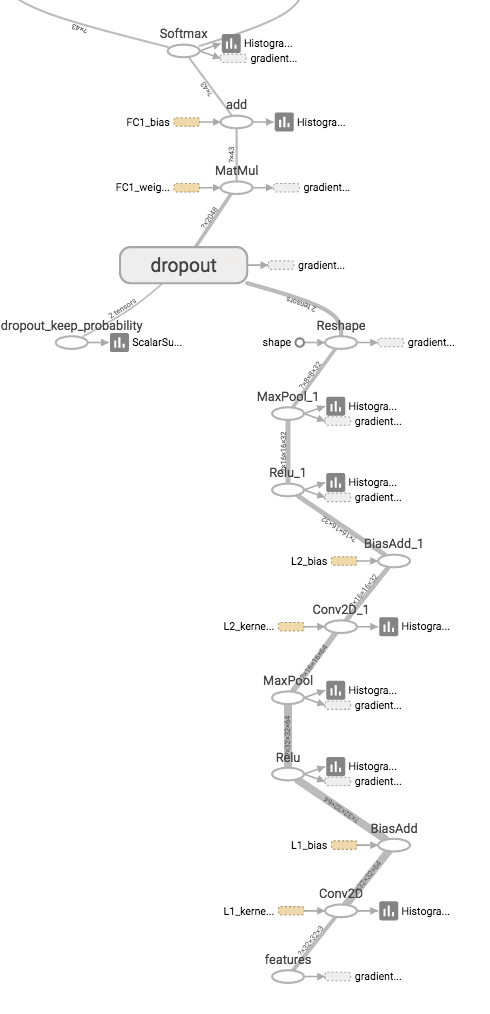

In [24]:
from IPython.display import Image
Image('CNN-graph.png')

In [25]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [26]:
# define shapes
features_shape = ((None,) + train_features.shape[1:])
labels_shape = (None,train_labels.shape[1],)

# create classifier
tsc = TrafficSignClassifier()

# define model
tsc.define_model(features_shape=features_shape, labels_shape=labels_shape)

INFO:tensorflow:Summary name mean/L1_kernel:0 is illegal; using mean/L1_kernel_0 instead.
INFO:tensorflow:Summary name stddev/L1_kernel:0 is illegal; using stddev/L1_kernel_0 instead.
INFO:tensorflow:Summary name max/L1_kernel:0 is illegal; using max/L1_kernel_0 instead.
INFO:tensorflow:Summary name min/L1_kernel:0 is illegal; using min/L1_kernel_0 instead.
INFO:tensorflow:Summary name histogram/L1_kernel:0 is illegal; using histogram/L1_kernel_0 instead.
INFO:tensorflow:Summary name mean/L1_bias:0 is illegal; using mean/L1_bias_0 instead.
INFO:tensorflow:Summary name stddev/L1_bias:0 is illegal; using stddev/L1_bias_0 instead.
INFO:tensorflow:Summary name max/L1_bias:0 is illegal; using max/L1_bias_0 instead.
INFO:tensorflow:Summary name min/L1_bias:0 is illegal; using min/L1_bias_0 instead.
INFO:tensorflow:Summary name histogram/L1_bias:0 is illegal; using histogram/L1_bias_0 instead.
INFO:tensorflow:Summary name mean/L2_kernel:0 is illegal; using mean/L2_kernel_0 instead.
INFO:tenso

In [27]:
# where we save trained variables
model_param_file = 'ckpt/cnn2-color-relu.ckpt'

# where we save graph and events/summaries for tensorflow
summary_dir = 'train_summaries'

tsc.set_save_files(model_param_file, summary_dir)

In [28]:
# learning parameters
epochs = 20
batch_size = 300
learning_rate = 0.001
max_iterations_without_improvement = 10
dropout_keep_probability=0.5

In [29]:
# create Tensorflow session
tsc.create_session(learning_rate)

In [30]:
# i have trained model several times, restarting from where I left off, sometimes changing parameters
#tsc.restore_variables()

In [31]:
#STOP
# here we can either train model or go below to run analysis on trained model

In [32]:
# main training
loss_epoch, train_acc_epoch, valid_acc_epoch, best_validation_accuracy = \
    tsc.train(train_images =     train_features, 
              train_labels =     train_labels, 
              validation_images =val_features, 
              validation_labels =val_labels, 
              learning_rate     =learning_rate, 
              dropout_keep_probability=dropout_keep_probability,
              batch_size        =batch_size, 
              epochs            =epochs, 
              max_iterations_without_improvement=max_iterations_without_improvement)

Val Accuracy Epoch  1/20: 100%|██████████| 20/20 [00:02<00:00,  7.57batches/s]


epoch 0, val accuracy: 0.6524991382955897
***


Val Accuracy Epoch  2/20: 100%|██████████| 20/20 [00:01<00:00, 12.03batches/s]


epoch 1, val accuracy: 0.8855831418180092
***


Val Accuracy Epoch  3/20: 100%|██████████| 20/20 [00:01<00:00, 12.03batches/s]


epoch 2, val accuracy: 0.942366556989948
***


Val Accuracy Epoch  4/20: 100%|██████████| 20/20 [00:01<00:00, 12.01batches/s]


epoch 3, val accuracy: 0.948996955948758
***


Val Accuracy Epoch  5/20: 100%|██████████| 20/20 [00:01<00:00, 12.04batches/s]


epoch 4, val accuracy: 0.9702482396183838
***


Val Accuracy Epoch  6/20: 100%|██████████| 20/20 [00:01<00:00, 12.02batches/s]


epoch 5, val accuracy: 0.9736484406919392
***


Val Accuracy Epoch  7/20: 100%|██████████| 20/20 [00:01<00:00, 12.03batches/s]


epoch 6, val accuracy: 0.9799388121156132
***


Val Accuracy Epoch  8/20: 100%|██████████| 20/20 [00:01<00:00, 12.02batches/s]


epoch 7, val accuracy: 0.983849046040619
***


Val Accuracy Epoch  9/20: 100%|██████████| 20/20 [00:01<00:00, 12.01batches/s]


epoch 8, val accuracy: 0.9852091263484404
***


Val Accuracy Epoch 10/20: 100%|██████████| 20/20 [00:01<00:00, 12.00batches/s]


epoch 9, val accuracy: 0.9867392166947394
***


Val Accuracy Epoch 11/20: 100%|██████████| 20/20 [00:01<00:00, 12.05batches/s]


epoch 10, val accuracy: 0.9880992970025608
***


Val Accuracy Epoch 12/20: 100%|██████████| 20/20 [00:01<00:00, 12.04batches/s]


epoch 11, val accuracy: 0.9886093240779745
***


Val Accuracy Epoch 13/20: 100%|██████████| 20/20 [00:01<00:00, 12.01batches/s]


epoch 12, val accuracy: 0.9894593783845224
***


Val Accuracy Epoch 14/20: 100%|██████████| 20/20 [00:01<00:00, 12.03batches/s]


epoch 13, val accuracy: 0.9904794386153885
***


Val Accuracy Epoch 15/20: 100%|██████████| 20/20 [00:01<00:00, 12.02batches/s]


epoch 14, val accuracy: 0.9887793371564715


Val Accuracy Epoch 16/20: 100%|██████████| 20/20 [00:01<00:00, 12.04batches/s]


epoch 15, val accuracy: 0.9899694084999554


Val Accuracy Epoch 17/20: 100%|██████████| 20/20 [00:01<00:00, 12.03batches/s]


epoch 16, val accuracy: 0.9892893672719045


Val Accuracy Epoch 18/20: 100%|██████████| 20/20 [00:01<00:00, 12.04batches/s]


epoch 17, val accuracy: 0.9926895672713199
***


Val Accuracy Epoch 19/20: 100%|██████████| 20/20 [00:01<00:00, 12.04batches/s]


epoch 18, val accuracy: 0.9909894687308215


Val Accuracy Epoch 20/20: 100%|██████████| 20/20 [00:01<00:00, 12.02batches/s]


epoch 19, val accuracy: 0.9940496494234196
***
runtime: 0:37:37.291352
best val accuracy: 0.9940496494234196
epochs: 19


In [33]:
# accuracy statistics for last epoch (train set and validation set). and also best seen validation set accuracy 
train_acc_epoch[-1], best_validation_accuracy

(0.99858973339402568, 0.99404964942341956)

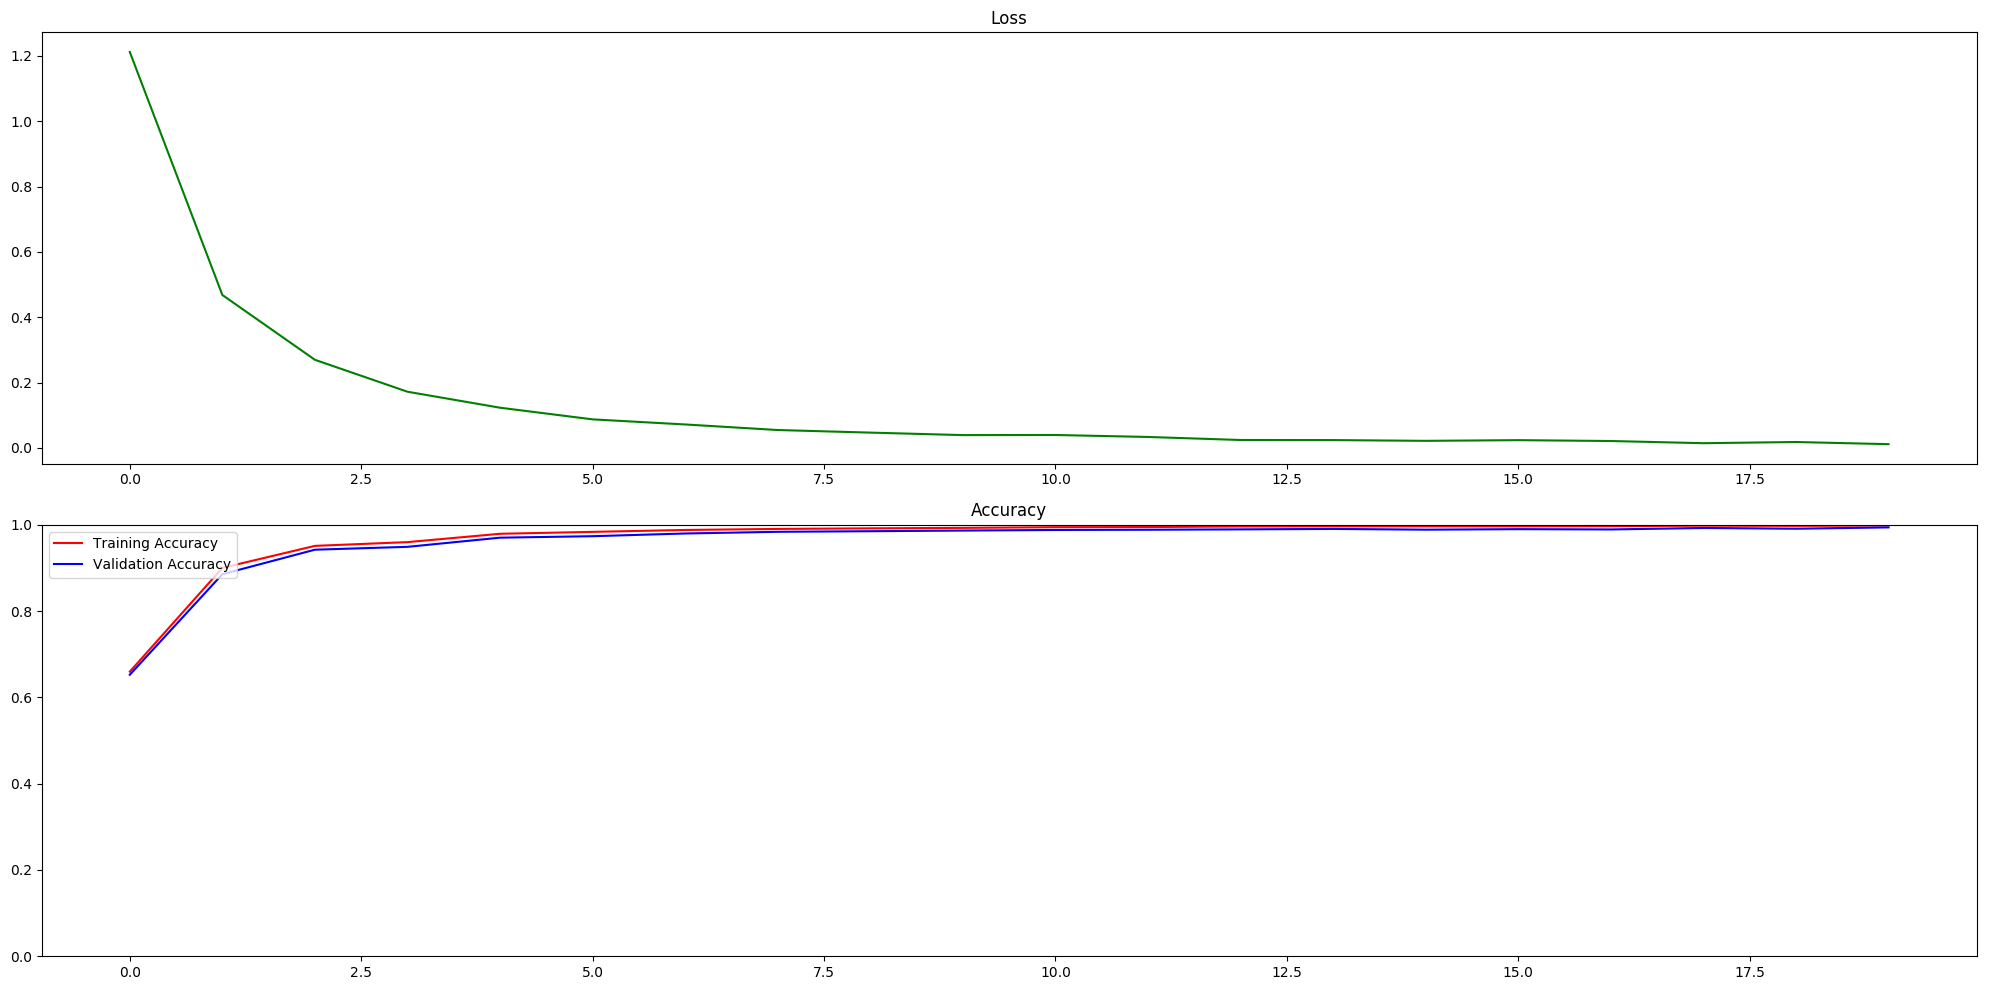

In [34]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(loss_epoch, 'g')
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(train_acc_epoch, 'r', label='Training Accuracy')
acc_plot.plot(valid_acc_epoch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.legend(loc=2)
plt.tight_layout()
plt.show()

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Alexey:

It took me a while to make it work.
The main issues were weight initializations and truncating prediction range so softmax does not blow up numerically.
I first used SGD optimizer, uniform (Xavier) initialization of weights and non-truncated predictions in softmax. Trying to overfit a small (~150 images) batch did not work. The accuracy would get stuck at around 5% and would not change from iteration to iteration. It did not depend on the learning rate.

Then I read the forums and implemented all suggestions:
1. using Adam optimizer
2. using small learning rate
3. using trancated normal distribution with standard deviation of 0.05 to initialize weights

And suddently the whole thing worked -- the validation accuracy got to 90% in 2-3 epochs.

I chose batch size of 150 mainly because initially I had a bigger model and it was crashing with OOM. But looking at memory utilization I suppose I can bump batch size to 300. The thing is -- it does not speed things up after about 150 images.

I use learning rate of 0.001, but Adam optimizer is adaptive, so it is not as critical as for SGD to get it absolutely right.

At first I did not use dropout layer. I managed to get to 100% train set accuracy and about 99.4% validation accuracy, but performance out-of-sample was poor -- 91%. Then I decided to add dropout. And it helped to improve validation accuracy to 99.7% but more importantly the net generalized better to out-of-sample examples. I got 95.3% accuracy.

.

## investigating accuracy on out of sample data

In [35]:
predicted_probabilities, predicted_classes, accuracy = \
  tsc.predict(images=val_features, 
              true_labels=val_labels, 
              batch_size=150)


In [36]:
accuracy

0.99404974289387915

In [37]:
# great, accuracy 99.74% on validation set.

In [38]:
predicted_probabilities.shape

(5882, 43)

In [39]:
predicted_probabilities[0]

array([  1.07959236e-12,   1.29247777e-08,   8.87857254e-09,
         3.88854659e-07,   5.49836301e-08,   7.45103193e-07,
         1.45771423e-07,   1.11502835e-10,   1.01342330e-08,
         1.08432562e-06,   6.94493352e-09,   8.34598946e-10,
         2.64919890e-06,   1.13242933e-07,   2.34613357e-10,
         4.48741062e-08,   2.57101185e-08,   2.00817019e-11,
         1.68447141e-08,   7.43728421e-08,   1.19601134e-06,
         1.05008216e-11,   6.13414519e-09,   4.07045375e-09,
         5.62079006e-09,   6.99983360e-08,   5.53525226e-09,
         2.50488008e-09,   6.29877164e-08,   2.63712585e-09,
         9.48756185e-10,   1.49422877e-10,   1.09693936e-07,
         1.19671473e-09,   7.06531580e-07,   1.10956616e-05,
         9.99910474e-01,   7.21838977e-10,   6.91805035e-05,
         1.29514477e-09,   5.66755745e-08,   1.57936461e-06,
         7.01228453e-09], dtype=float32)

In [40]:
predicted_classes[0]

36

In [41]:
certainty = predicted_probabilities.max(axis=1)

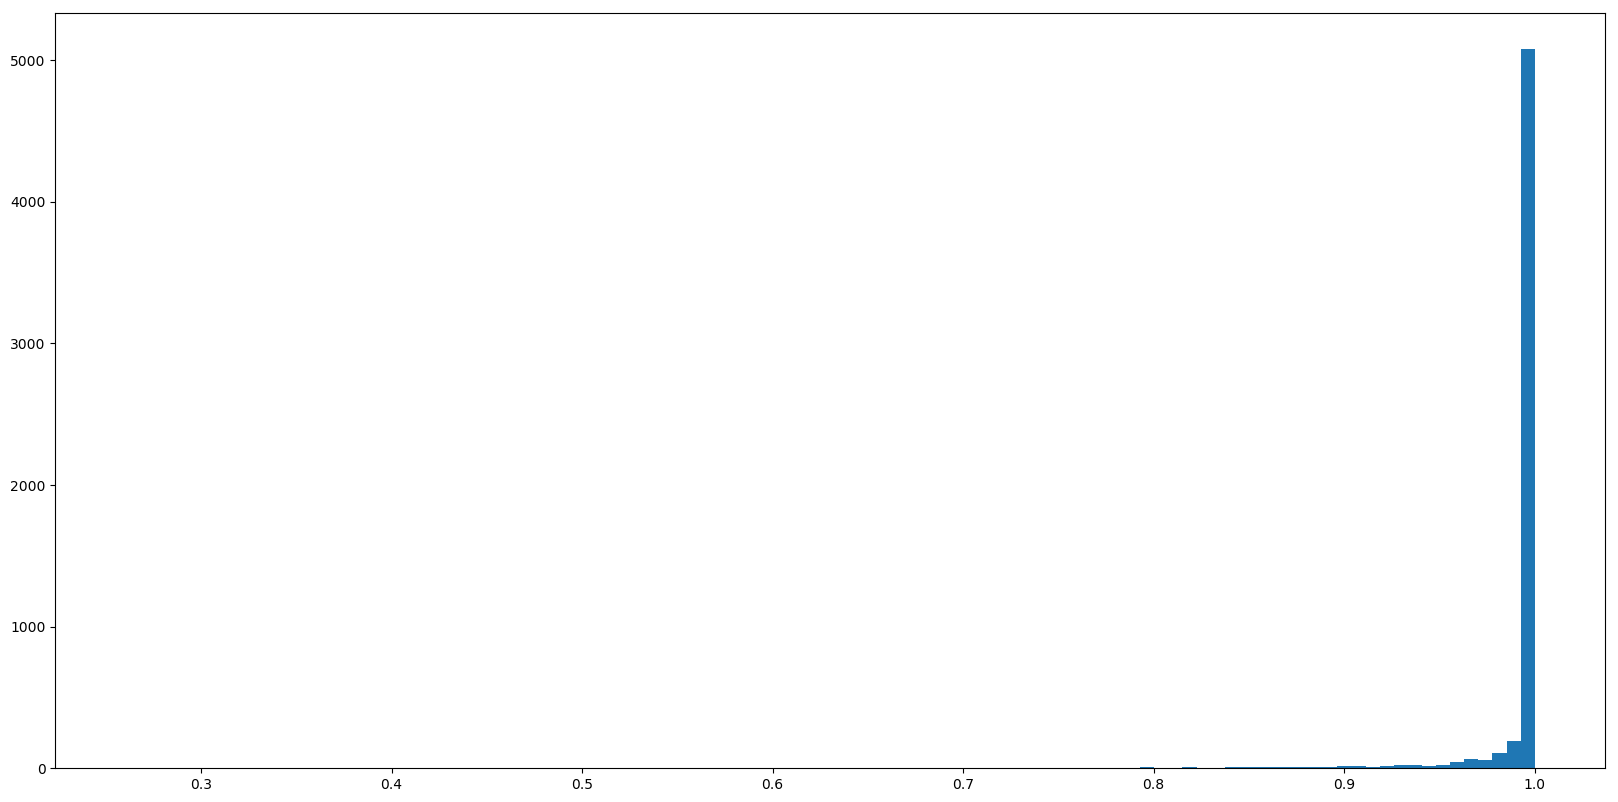

In [42]:
plt.hist(certainty, bins=100);

In [43]:
len(certainty[certainty<.98])

530

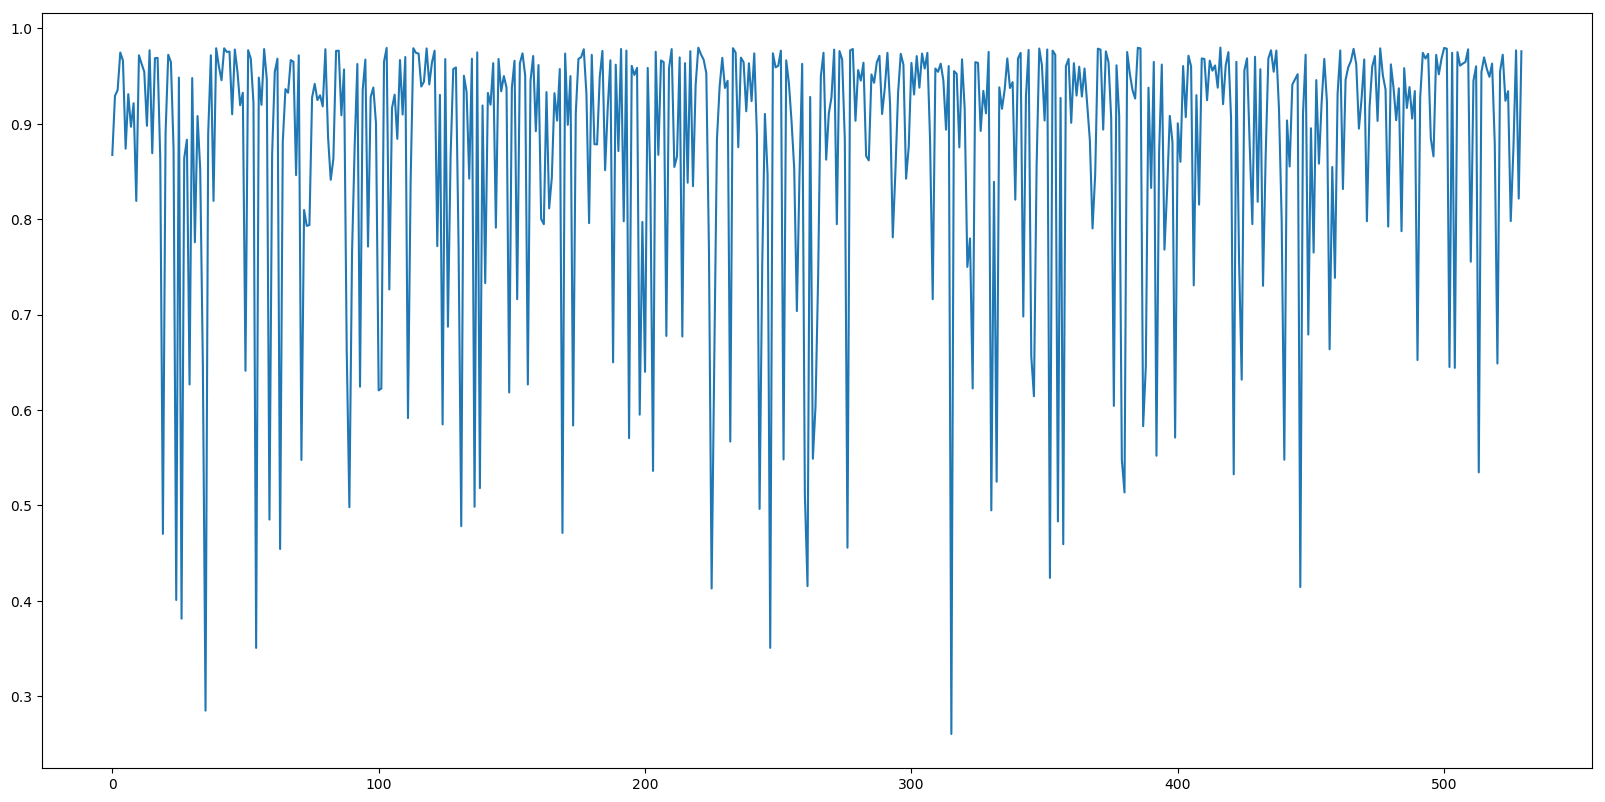

In [44]:
plt.plot(certainty[certainty<.98]);

In [45]:
# hm, interesting. the model is very opinionated and classifies vast majority of images with 98%+ certainty

In [46]:
# NOW test model predictions on test.p data which was not used in training or cross-validation

In [47]:
predicted_probabilities, predicted_classes, accuracy = \
  tsc.predict(images = x_test_norm, 
              true_labels = y_test_norm, 
              batch_size = 150)


In [48]:
accuracy

0.93745051257117629

In [49]:
# 95.64% accuracy. great! model generalises very well! lets analyse what is working and what is not.

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
def print_test_accuracy(images, cls_pred, cls_true, 
                        show_example_errors=False,
                        show_confusion_matrix=False):
    num_test = len(images)
    num_classes = len(set(cls_true))

    correct = (cls_true == cls_pred)
    correct_sum = correct.sum()
    acc = float(correct_sum) / num_test

    msg = "Accuracy: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    if show_example_errors:
        print("Example errors:")
        incorrect = (correct == False)
        im = images[incorrect]
        cp = cls_pred[incorrect]
        ct = cls_true[incorrect]
        show_images(im, ct, 3, 4, labels_predicted=cp, random=False)
                
    if show_confusion_matrix:
        print("Confusion Matrix (log):")
        # Get the confusion matrix using sklearn.
        cm = confusion_matrix(y_true=cls_true,
                              y_pred=cls_pred)
        #print(cm)
        plt.matshow(np.log(cm))
        plt.colorbar()
        tick_marks = np.arange(num_classes)
        plt.xticks(tick_marks, range(num_classes))
        plt.yticks(tick_marks, range(num_classes))
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()        

In [52]:
# lets look at first 26x26 cells of confusion matrix
cm = confusion_matrix(y_true=y_test,
                      y_pred=predicted_classes)
np.set_printoptions(threshold=np.nan, linewidth=200)
print(cm[:25,:25])
np.set_printoptions(threshold=30, linewidth=75)

[[ 32  28   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 700  11   0   4   0   0   1   1   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   9 733   5   1   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 433   0  10   1   2   0   1   1   0   0   1   0   1   0   0   0   0   0   0   0   0   0]
 [  2  30   6   0 604   2   0   8   2   0   1   0   2   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   3  21  22   2 561   0   7   6   0   4   0   0   3   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  18 100   0   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0]
 [  0   3   0   1   1  15   0 392  24   9   3   1   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   1   1   3   1   0   2 439   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 474   6   0   0   0   0   0   0   0

Accuracy: 93.7% (11840 / 12630)
Example errors:
Confusion Matrix (log):


/Users/alexeysimonov/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log


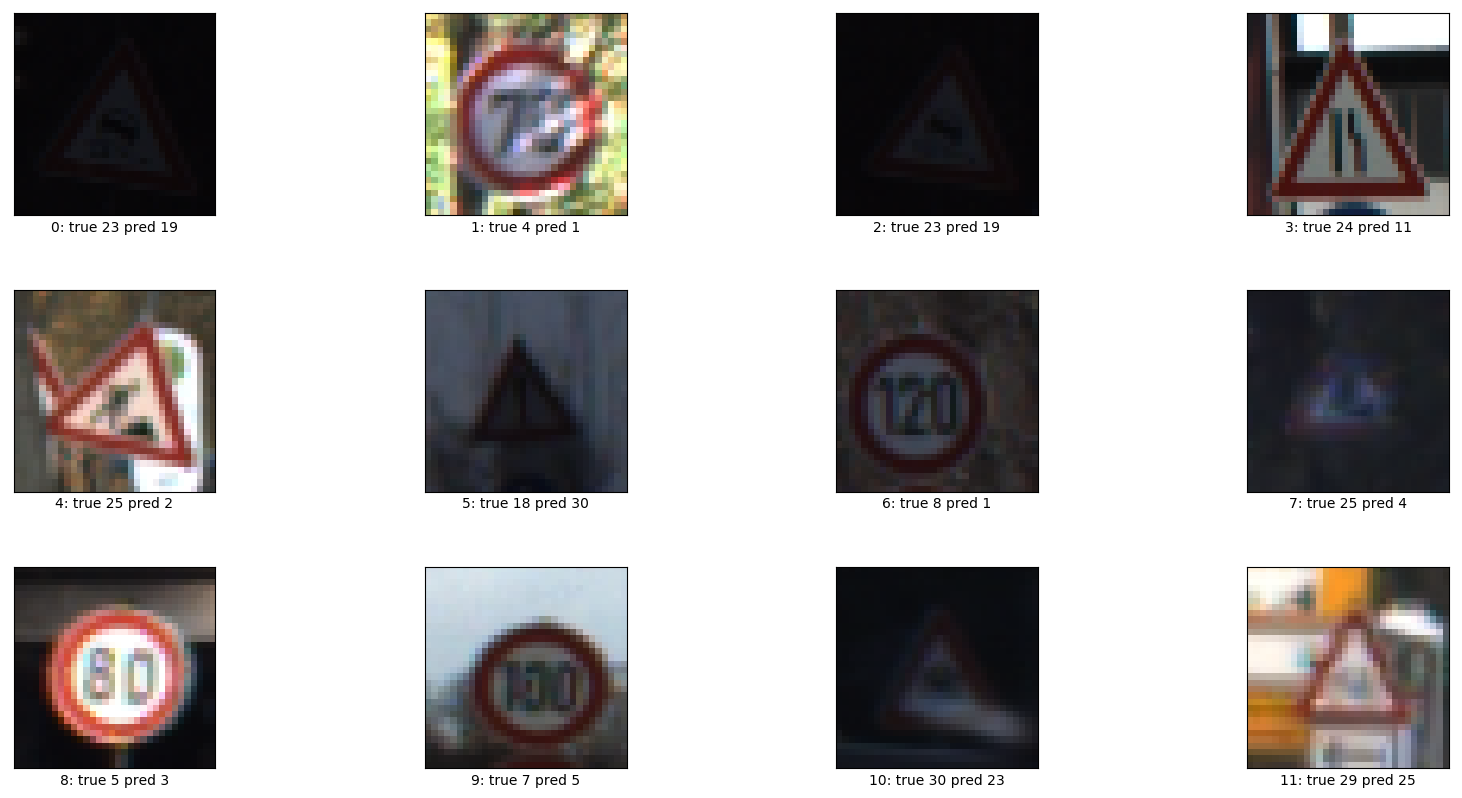

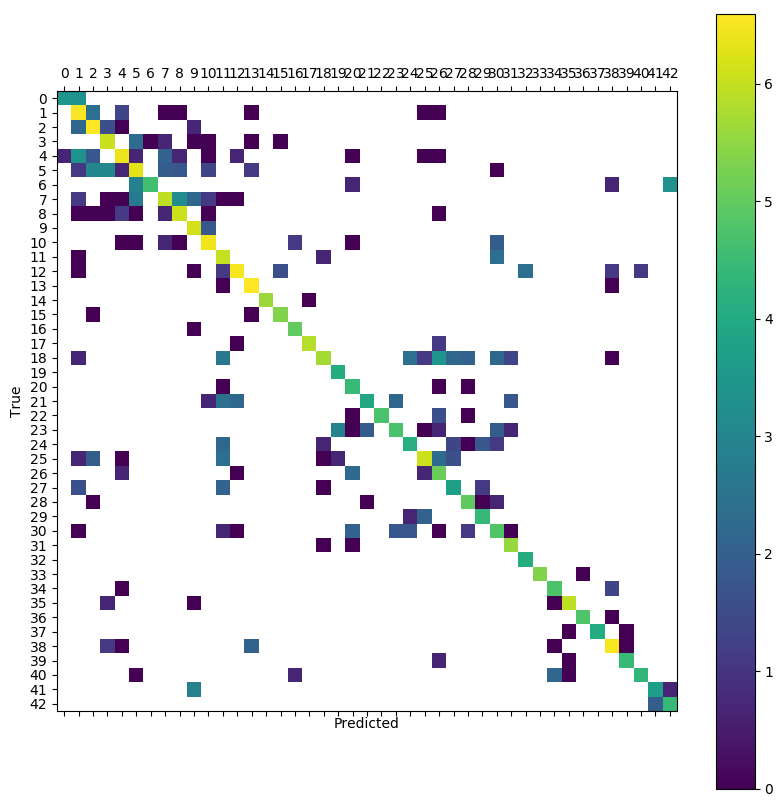

In [53]:
# visualize example error images and confusion matrix
print_test_accuracy(images=X_test, 
                    cls_pred=predicted_classes, 
                    cls_true=y_test, 
                    show_example_errors=True, 
                    show_confusion_matrix=True)

In [54]:
# read the sign names into a dict
import csv
reader = csv.DictReader(open('signnames.csv'))
signnames = {}
for row in reader:
    signnames[int(row['ClassId'])] = row['SignName']    

In [55]:
# visualize instances where model is misclassifying big number of images

In [56]:
def print_one_confusion(images, true_labels, predicted_labels, show_true_class, show_false_class):
    idx = np.logical_and(true_labels==show_true_class, predicted_labels==show_false_class)
    cnt = sum(idx)
    print('true class "{}", predicted class "{}". found: {}'.format(signnames[show_true_class], signnames[show_false_class], cnt))
    cols = int(np.ceil(cnt/10))
    show_images(images[idx], true_labels[idx], cols, 10, random=False, labels_predicted=predicted_labels[idx])

true class "Double curve", predicted class "Priority road". found: 9


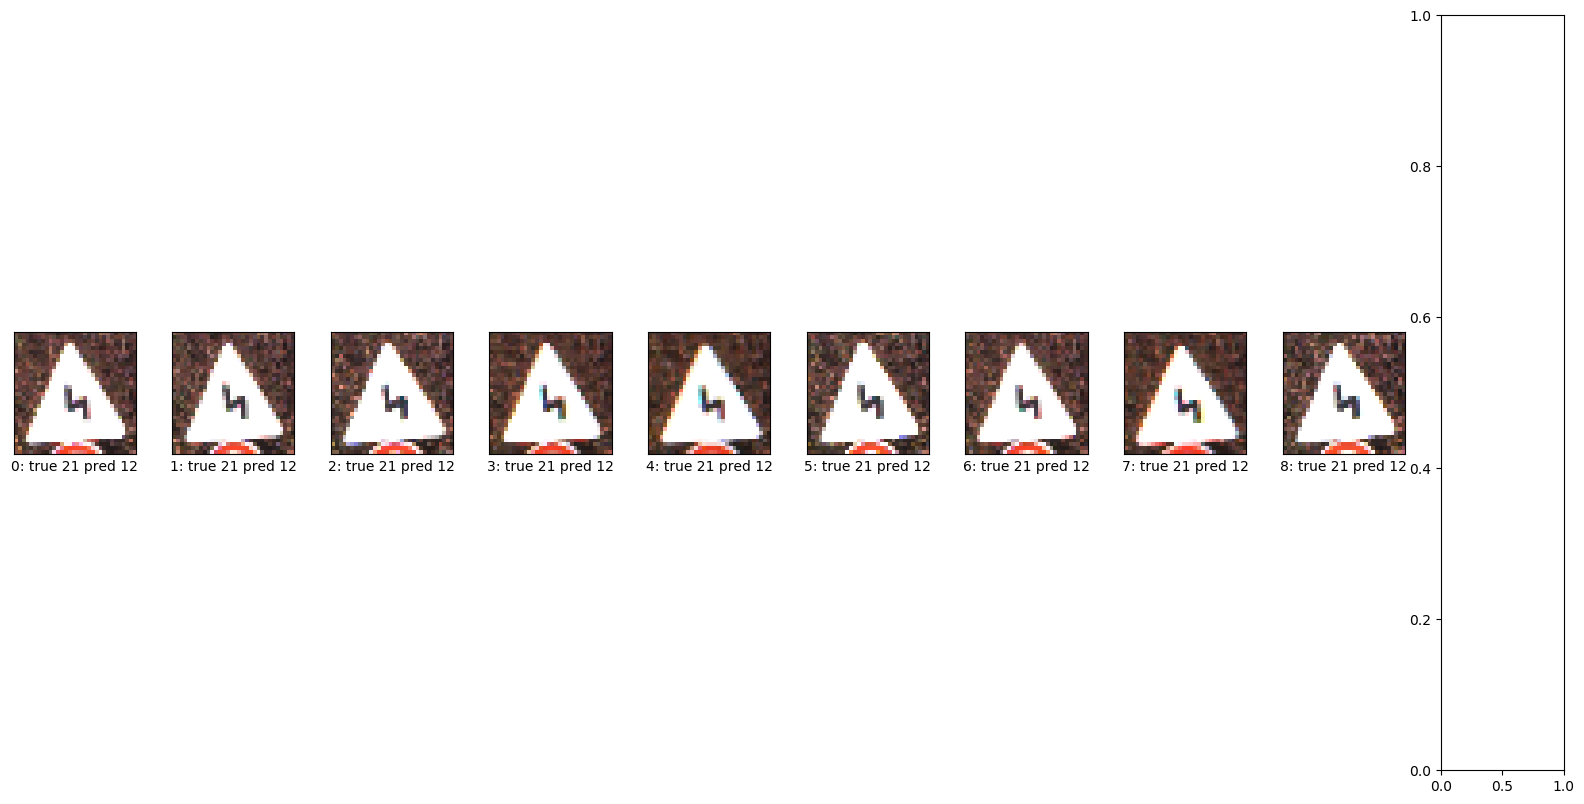

In [57]:
print_one_confusion(images=X_test, true_labels=y_test, predicted_labels=predicted_classes, 
                    show_true_class=21, show_false_class=12)
# what we see here is the same test set image (may be with small transformations) that was misclassified.
# this seems like a genuine defficiency of the model -- the predicted sign is very different visually than the image

true class "Beware of ice/snow", predicted class "Slippery road". found: 6


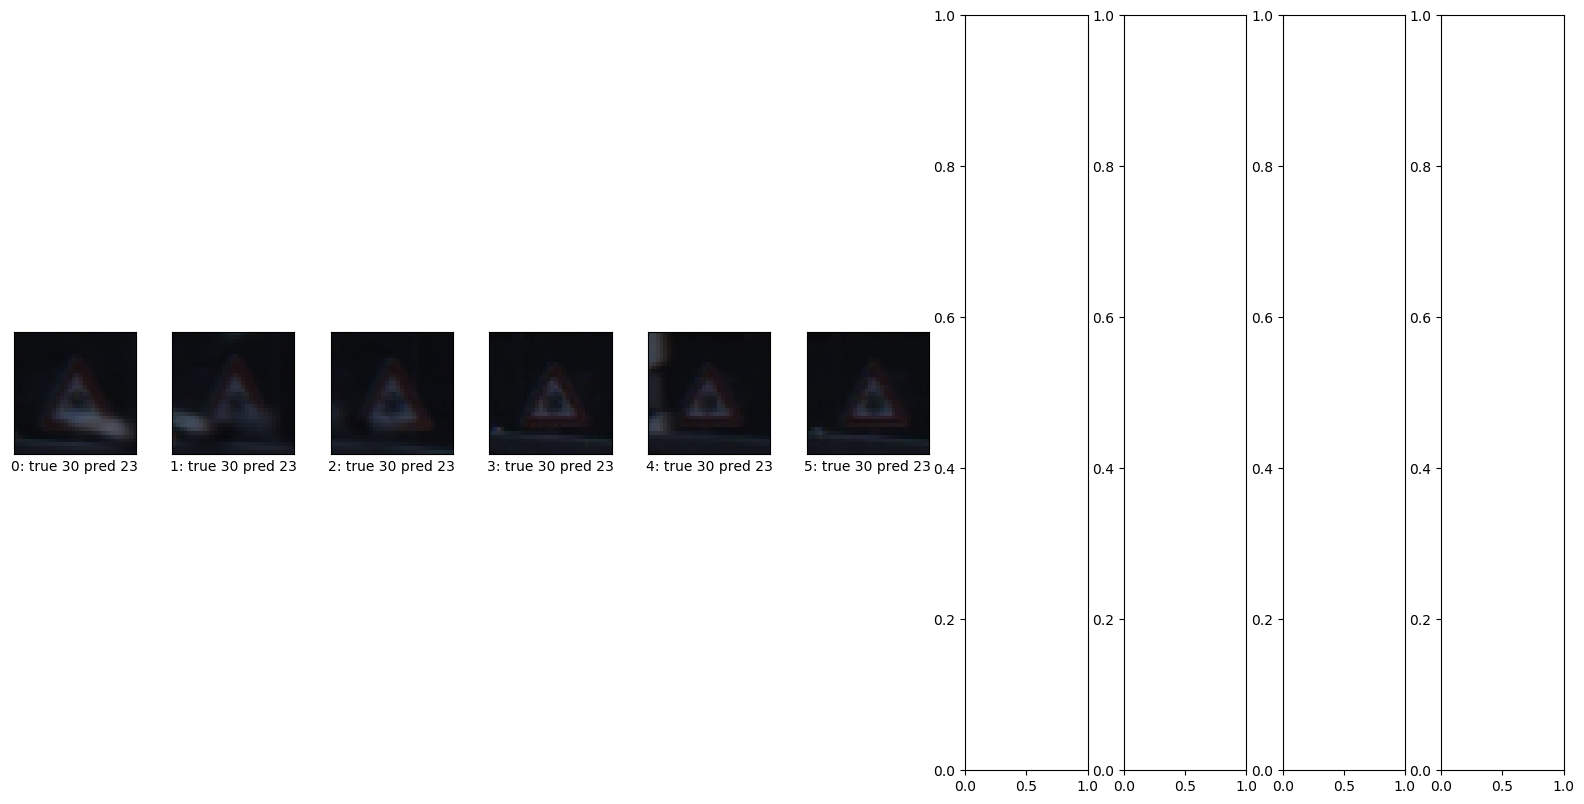

In [58]:
print_one_confusion(images=X_test, true_labels=y_test, predicted_labels=predicted_classes, 
                    show_true_class=30, show_false_class=23)
# with this one it looks like the same image, with slight transformations. the quality is quite poor, so its 
# understandable that model had hard time predicting it. the shape of the sign is actually right. and the picture
# inside triangle is not very legible even for a human, so this is probably ok

true class "Speed limit (100km/h)", predicted class "Speed limit (80km/h)". found: 15


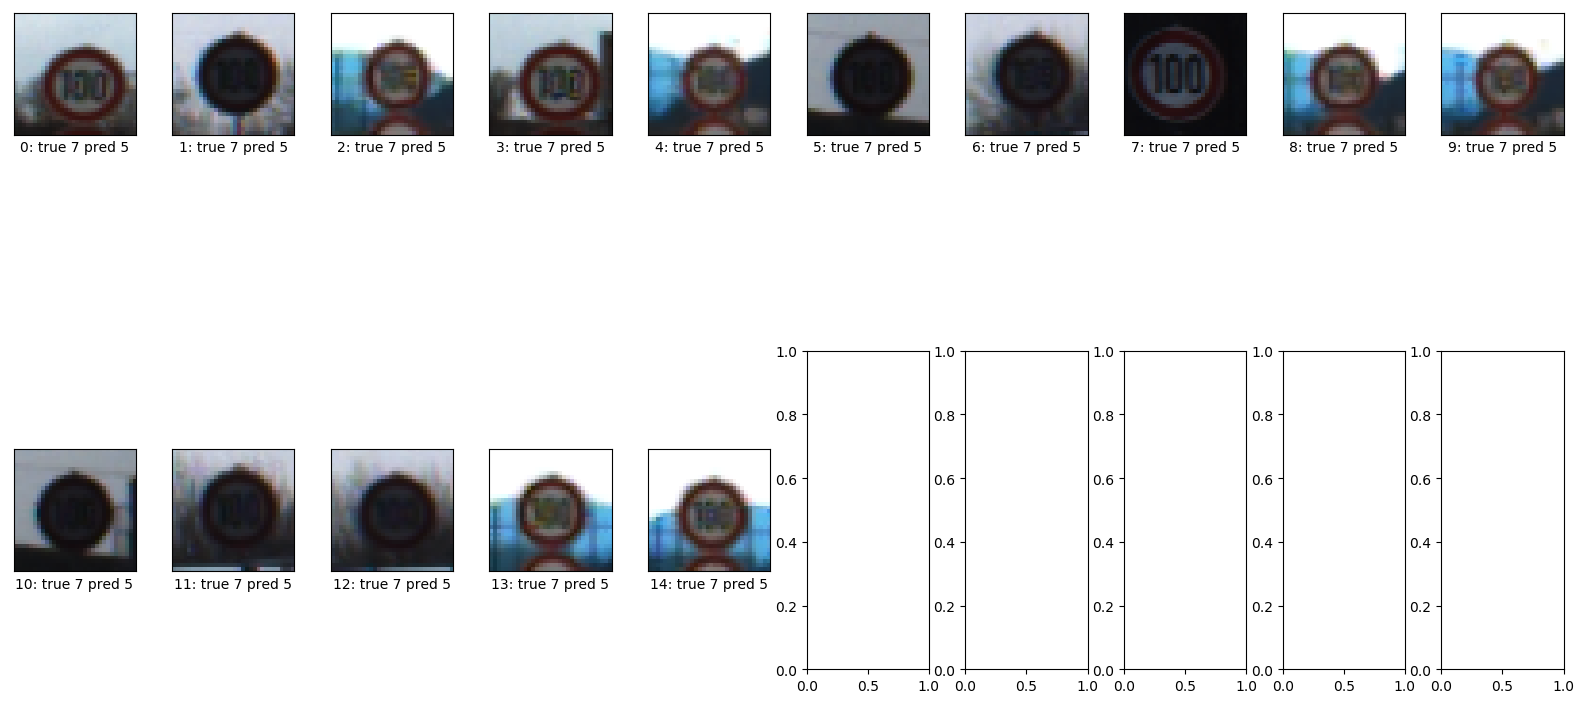

In [59]:
print_one_confusion(images=X_test, true_labels=y_test, predicted_labels=predicted_classes, 
                    show_true_class=7, show_false_class=5)
# we see in confusion matrix that all the speed limit signs have high misclassification errors between them.
# looks like the quality of the picture need to increase (better resolution is required)
# for model to be more discerning between different speed limits.

true class "End of speed limit (80km/h)", predicted class "End of no passing by vechiles over 3.5 metric tons". found: 28


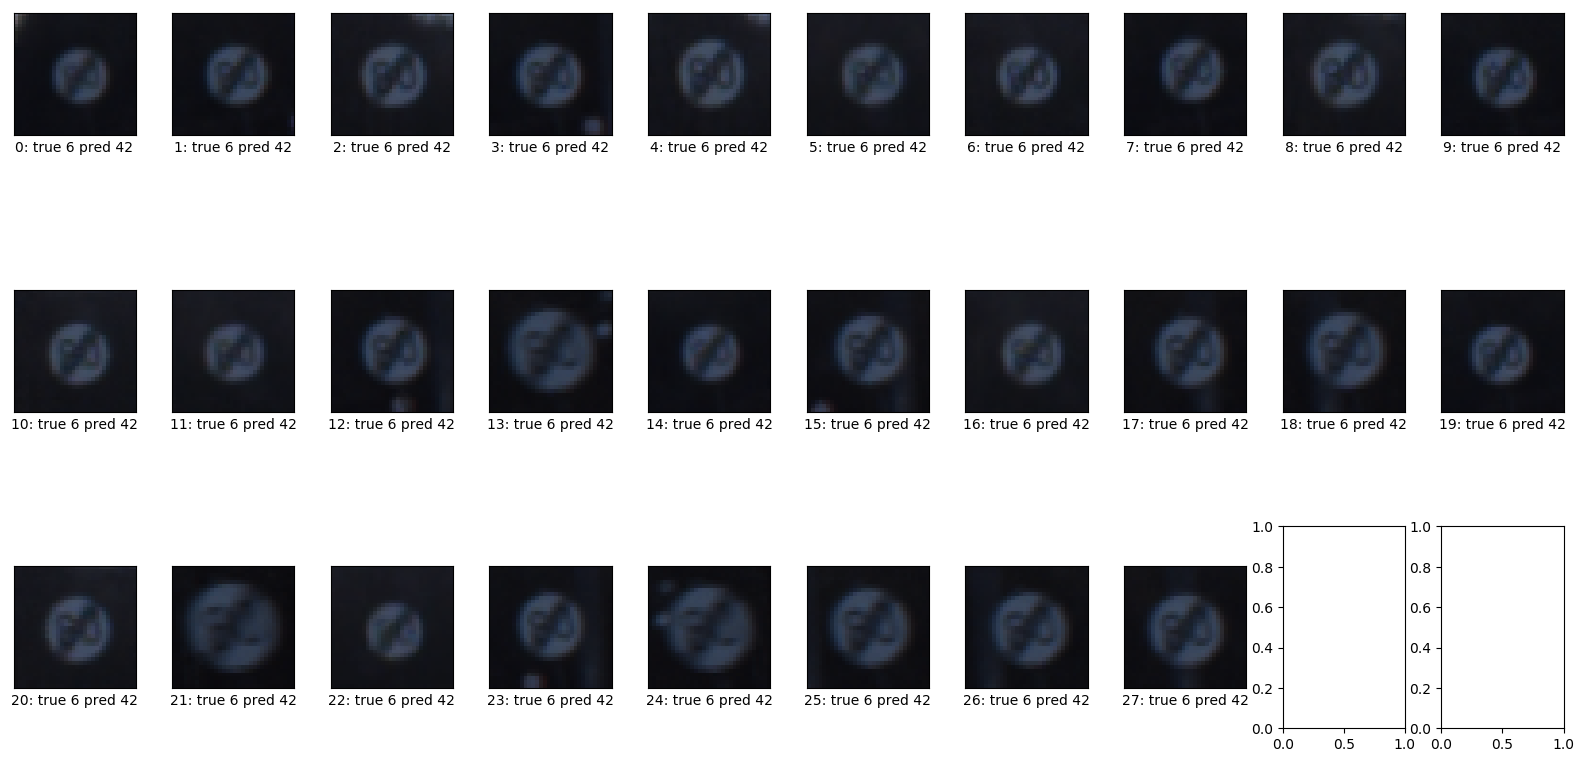

In [60]:
print_one_confusion(images=X_test, true_labels=y_test, predicted_labels=predicted_classes, 
                    show_true_class=6, show_false_class=42)
# looks like in this case the model is confused by the 'end' part -- the line across the sign. so it used the shape
# and the cross line as main features. it also interpreted 80 as two vehicles passing each other (see below for
# images of the 'end of passing' sign examples)

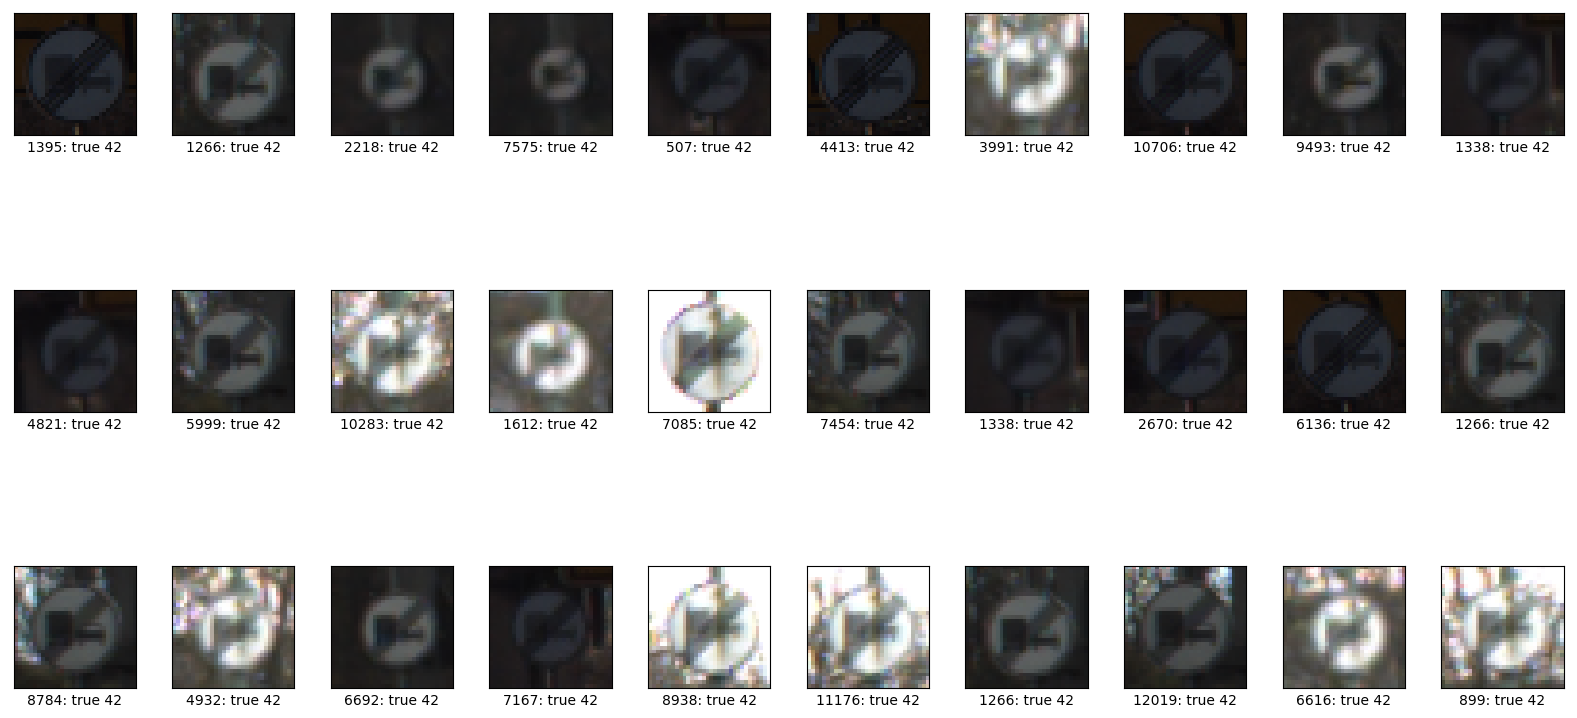

In [61]:
rows = 3
cols = 10
cls = 42
show_images(X_test, y_test, rows, cols, cls)

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

Alexey:

I have first tried to use simple perceptron fully connected layer as the easiest solution and got to good accuracy on validation set. But then I decided to apply the knowledge of Convolutional Networks and this is where I experienced difficulties. I also had to solve technical problem of making learning run faster on my Macbook so I had to find an arcane way to build tensorflow with CUDA support following some instructions on the internet.

I also experimented with grayscale/colour normalizations, but found the most straightforward one the most helpful.

As for the CNN architecture -- I was inspired by CIFAR-10 example in tensorflow, but ended up cutting some things from it for simplicity and to overcome some technical limitations. It was trial and error

Then when I was stuck with my net not learning I got on the SDC ND forums and followed advice which other people upvoted. 

.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [62]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [63]:
import scipy as sp
import glob

In [64]:
imageFolderPath = 'mine/'
imagePath = glob.glob(imageFolderPath+'/*.png') 

In [65]:
im_array = np.stack( [sp.misc.imresize(sp.misc.imread(file, mode='RGB'), size=(32,32),interp='bicubic') for file in imagePath], axis=0 )

In [66]:
im_array.shape

(6, 32, 32, 3)

In [67]:
# actually the first one is 'road narrows on the left' -- for UK. but the closest class is 'road narrows on the right'
im_true_label = [24,17,13,0,-1,-1]

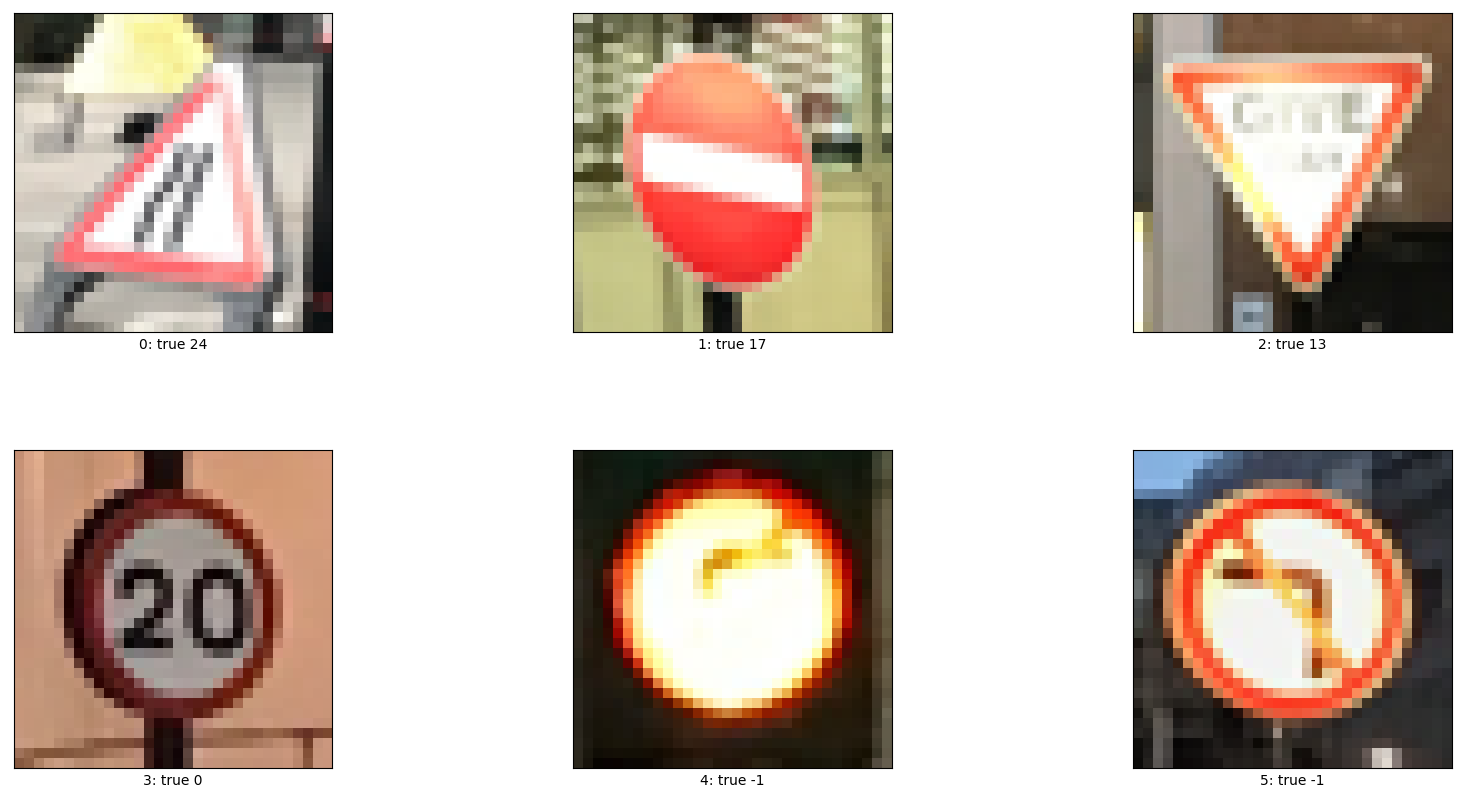

In [68]:
show_images(im_array, im_true_label, rows=2, cols=3, random=False)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

Alexey:

I have taken 6 images around central London. I have then manually selected the signs from the images and saved into files signN.png.
The code above loads them up and re-samples to be 32x32 pixels with full RGB channels.

We see that some signs are at an angle to the camera, some signs are illuminated which makes it hard for camera to get the right picture.

Some of the signs do not appear in the original German data set, i.e. 'no left turn' and 'no right turn'. 'yield' sign has 'give way' words in it, which is absent in training set.

.

In [69]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [70]:
x = normalize_data(im_array)
y = encoder.transform(im_true_label)

In [71]:
x.shape

(6, 32, 32, 3)

In [72]:
y.shape

(6, 43)

In [73]:
predicted_probabilities, predicted_classes, accuracy = \
  tsc.predict(images = x, 
              true_labels = y, 
              batch_size = 150)


In [74]:
accuracy

0.66666668653488159

In [75]:
predicted_classes

array([24, 17, 13,  0, 15,  4])

In [76]:
im_true_label

[24, 17, 13, 0, -1, -1]

In [77]:
# so we classified two signs correctly: 'no entry' and 'yield'.
# 'road narrows on the right' was classified as 'right of way at next intersection'. this seems sensible -- 
# see below pictures. 'right of way' is also triangular sign with black picture inside. so they can be mistaken.
# 'speed limit 20' became 'speed limit 30'. it could be because its at a slight angle. or it could be differences in
# font between Germany and UK.
# 'no right turn' and 'no left turn' were classified as 'speed limit 50' and 'speed limit 70'. this is interesting.
# given that there is no example of these signs in the data set its easy to see that their features (round red circle
# with black images in the middle) could be attributed to 'speed limit' signs. for 'no left turn' its even
# easy to see that the black line is resembling number 7, so it makes sense how it was classified.

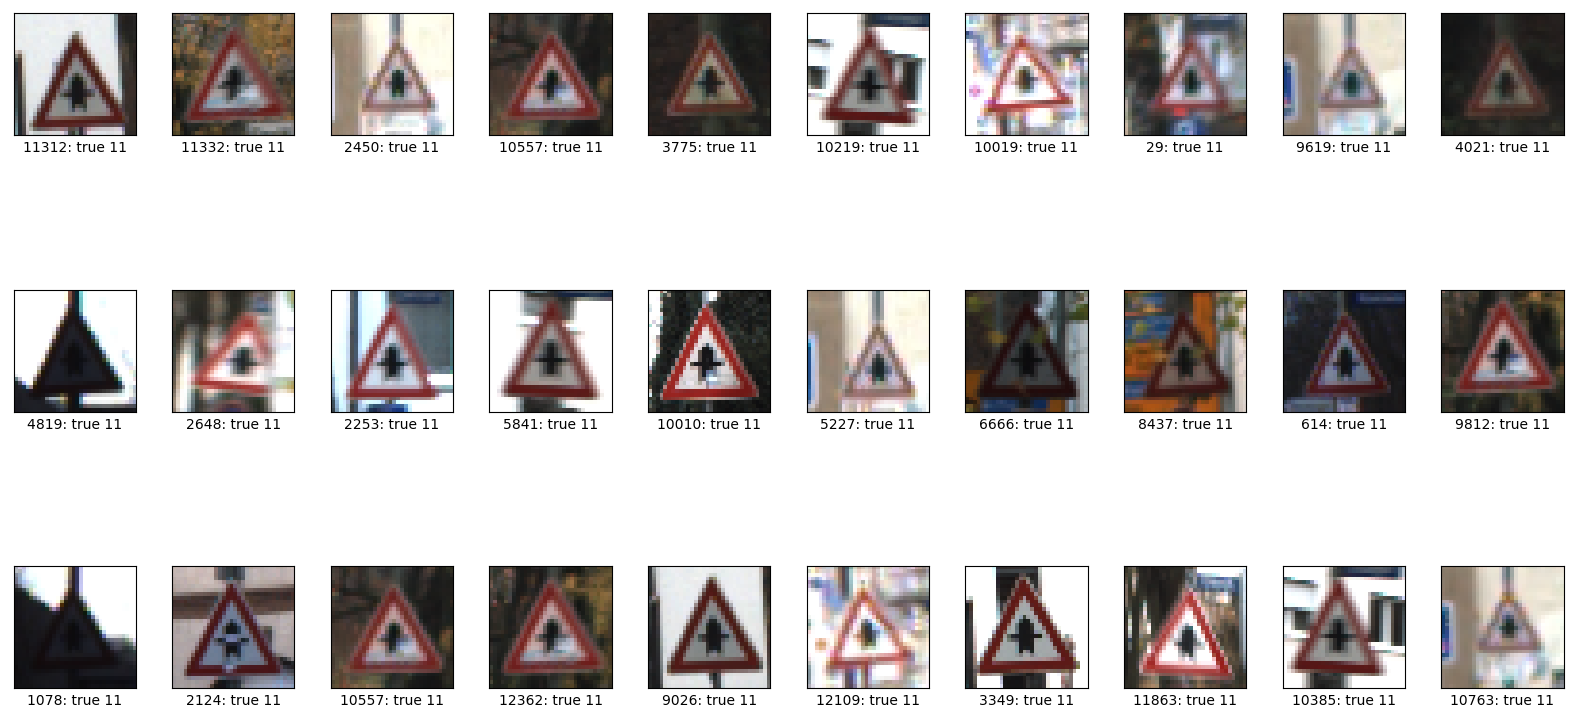

In [78]:
rows = 3
cols = 10
cls = 11
show_images(X_test, y_test, rows, cols, cls)

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Alexey:

Probabilities are presented below for 6 classified signs.
We see that the model is very opinionated with all signs classified with more than 90% 'softmax probability'

.

In [79]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

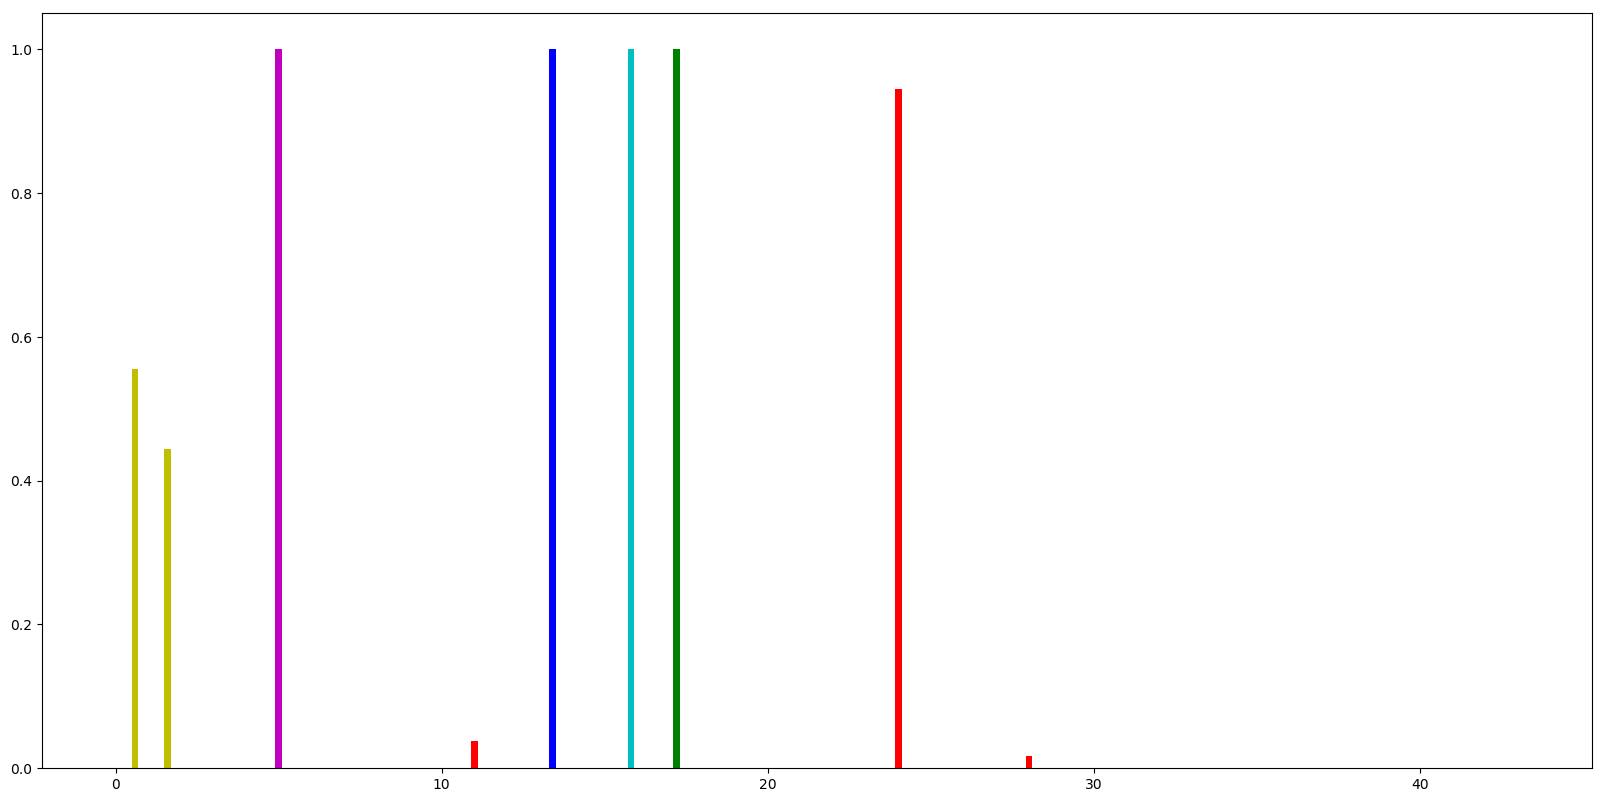

In [80]:
ax = plt.subplot(111)
x = np.array(range(43), dtype=np.float)
colors = 'rgbycm'
width = 0.2
for i in range(6):
    ax.bar(x+width*i, predicted_probabilities[i],width=0.2,color=colors[i],align='center');

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

Alexey:

With this particular model there is at most one other 'distant second' alternative prediction as is evident from visualisations above. The model is very opinionated and its not worth analysing 'top 5' contendants as model certainty drops to pretty much zero with alternatives 3+.

.


### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

Alexey:

I first implemented model as sequence of commands in various cells in the notebook.

After tweaking it and making it work I have re-factored the model into a class that:
1. defines model
2. trains model
3. saves variables
4. restores variables from previous training
5. runs predictions on input images.

The resulting solution is much easier to use and understand. It can be improved, but I have spent more time than allocated already so have to move on to the next project


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [81]:
tsc.close_session()